In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('Data.csv')

In [31]:
print(data.head())

                                          image_name class  feature_0  \
0  video-jNQtRj6NGycZDEXpe-frame-002745-hD77p8GPo...  bike   0.592699   
1  video-Gfv3kbdf5KAYRtPcz-frame-003465-ZK64MTpDB...  bike   0.129109   
2  video-rYXSHjnEfuLmjE6Z4-frame-000282-9DsLzj8zD...  bike   0.197805   
3  video-Gfv3kbdf5KAYRtPcz-frame-003031-pN4SMGv4P...  bike   0.712441   
4  video-BjSfmxLQqCGjg8tya-frame-000645-gyu9wMM3z...  bike   0.585288   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.451727  -1.002004  -0.121421  -0.004720  -1.136993   1.756335   
1  -0.332358  -0.227406  -0.255327   0.219230  -0.666518   0.987676   
2  -0.429209  -0.088233  -0.117236   0.376269  -0.305559   1.064518   
3  -0.253060  -0.506600  -0.175965  -0.051375  -0.870011   1.164238   
4  -0.675755   0.040474   0.666216   0.534574  -0.122698   1.297833   

   feature_7  ...  feature_246  feature_247  feature_248  feature_249  \
0   1.126653  ...     1.391706    -1.700207    -0.868406    -

In [32]:
print(data.info()) 
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 258 entries, image_name to feature_255
dtypes: float64(256), object(2)
memory usage: 9.8+ MB
None
class
bike      1000
bus       1000
car       1000
person    1000
sign      1000
Name: count, dtype: int64


FLIR Thermal data


The provided data contain 5K images from 5 classes ['person','sign','bike','bus','car']

two files files are provided:

 - Data: Contains the 256 features extracted from all the provided 5K images. (using a CNN) and it has also the class and the name of the image.

 - image_folder: this one contains 5 files for the different classes we have in order to access a specific image from the data you just search the image name in that folder based on which class.



In [33]:
print(data.isnull().sum())

image_name     0
class          0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_251    0
feature_252    0
feature_253    0
feature_254    0
feature_255    0
Length: 258, dtype: int64


In [34]:
X = data.iloc[:, 2:].values  
y = data['class'].values
image_names = data['image_name'].values

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (5000, 256), Labels shape: (5000,)


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

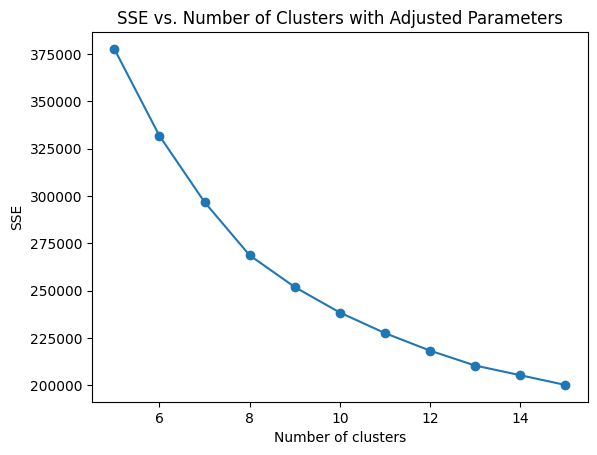

In [36]:
sse = []
for k in range(5, 16):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',   
        n_init=10,          
        max_iter=300,      
        tol=1e-4,           
        random_state=0      
    )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.plot(range(5, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters with Adjusted Parameters')
plt.show()


In [37]:
optimal_k = 8

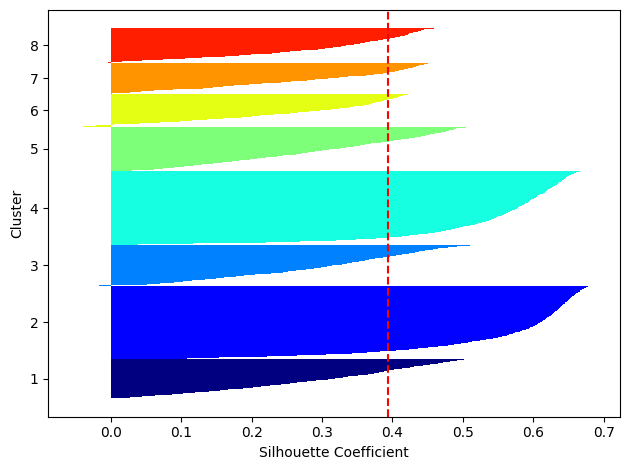

In [38]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
y_km = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
n_clusters = len(np.unique(y_km))

for i, c in enumerate(np.unique(y_km)):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, edgecolor='none', color=color, height=1.0)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

    
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, np.unique(y_km) + 1)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_pdf import PdfPages
import os
from PIL import Image

In [40]:
data = pd.read_csv("Data.csv")

In [41]:
image_names = data['image_name'].values
image_classes = data['class'].values


In [42]:
images_folder = "images"


In [43]:
missing_files = []

for img_name, img_class in zip(data['image_name'], data['class']):
    img_path = os.path.join(images_folder, img_class, img_name)
    if not os.path.exists(img_path):
        missing_files.append(img_path)

print(f"Number of missing files: {len(missing_files)}")
for file in missing_files[:10]: 
    print(file)

Number of missing files: 940
images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg
images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg
images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg
images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg
images/sign/video-TTDq3x6HSvFx3YRDH-frame-001745-BtqNudymACbxH4xNB_21903.jpg
images/sign/video-vvYEi6EdCrYXeHwpD-frame-002446-24thDFiFrP3iFuP3a_171694.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-005043-wMLgsgNcBvRbFJf8D_141031.jpg
images/sign/video-kDDWXrnLSoSdHCZ7S-frame-006023-bWSyPEEDowYd34uAE_40703.jpg
images/sign/video-WiuWWrsHrJsDcfFzg-frame-008521-HPvtFGMY7q2zc9E2f_144972.jpg


In [44]:
images = []


for img_name, img_class in zip(image_names, image_classes):
   
    img_path = os.path.join(images_folder, img_class, img_name)
    
    try:
        
        img = Image.open(img_path).resize((32, 32))
        img_array = np.array(img)
        images.append(img_array)  
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")


images = np.array(images)


print(f"Loaded {len(images)} images with shape: {images[0].shape}")

Error loading image images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg: [Errno 2] No such file or directory: 'images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg'
Error loading image images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg: [Errno 2] No such file or directory: 'images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg'
Error loading image images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg: [Errno 2] No such file or directory: 'images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg'
Error loading image images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg: [Errno 2] No such file or directory: 'images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg'
Error loading image images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg: [Errno 2] No such file or directory: 

In [45]:
data['file_exists'] = data.apply(
    lambda row: os.path.exists(os.path.join(images_folder, row['class'], row['image_name'])), 
    axis=1
)
 

Core Samples:


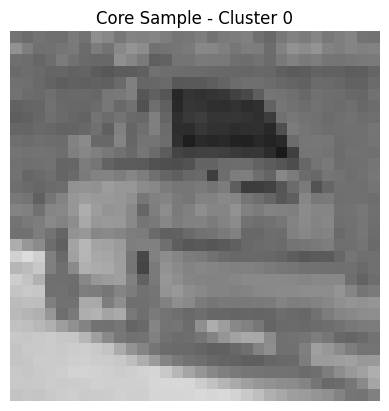

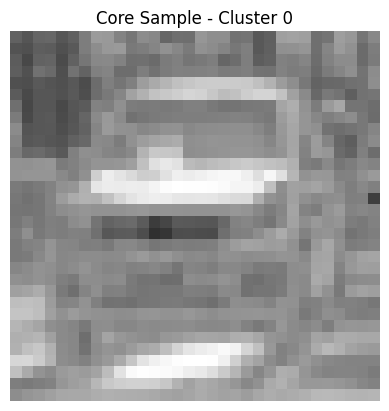

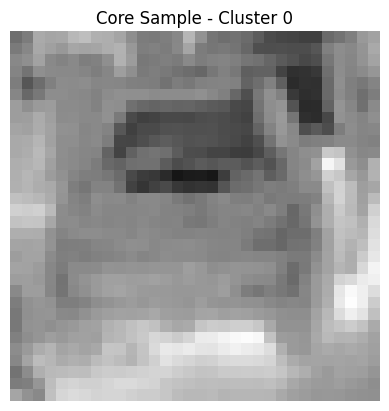

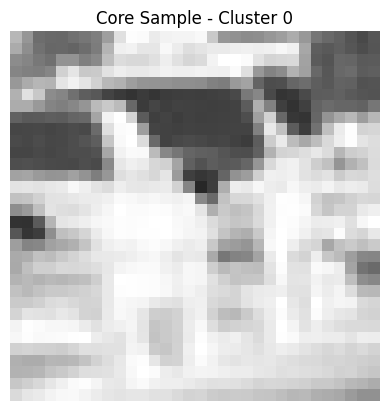

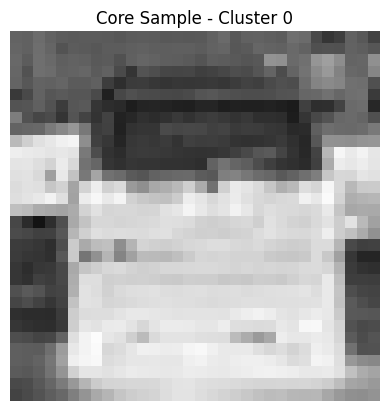

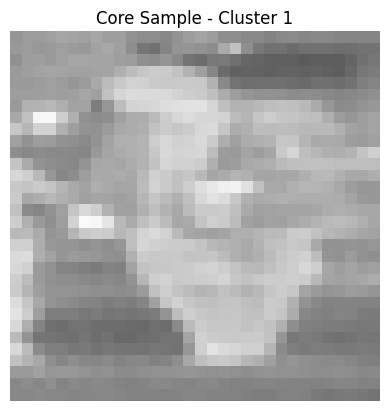

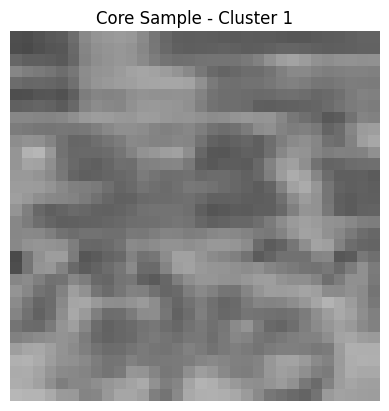

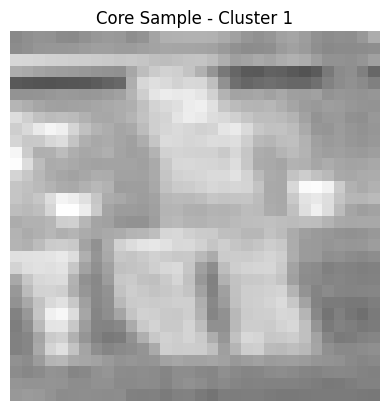

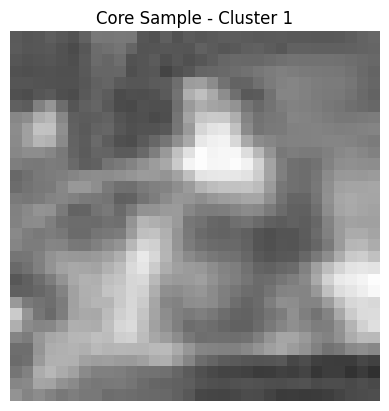

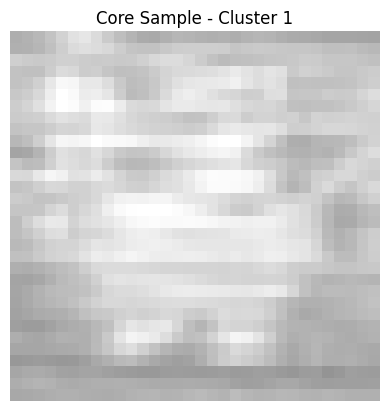

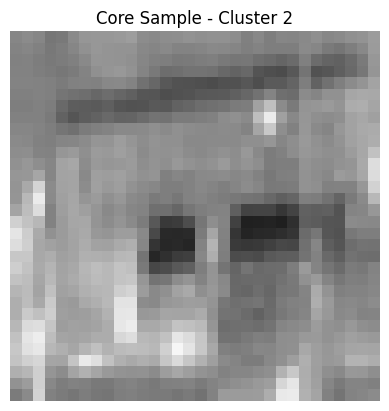

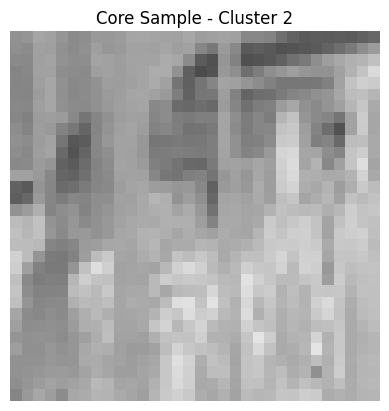

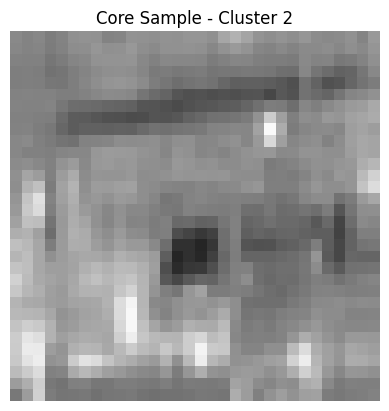

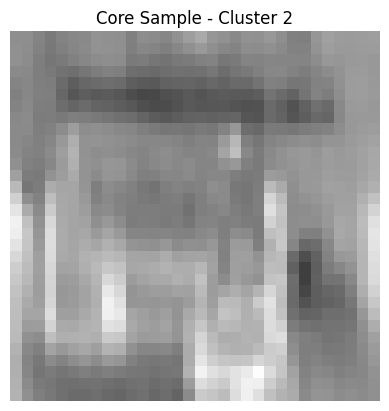

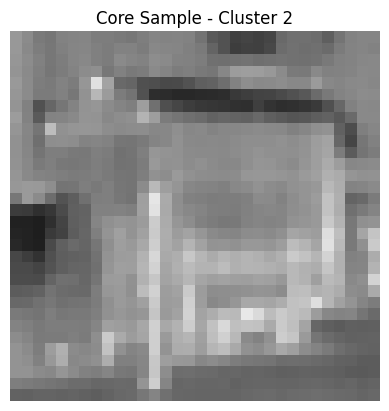

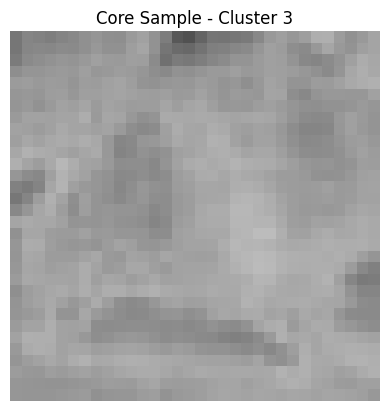

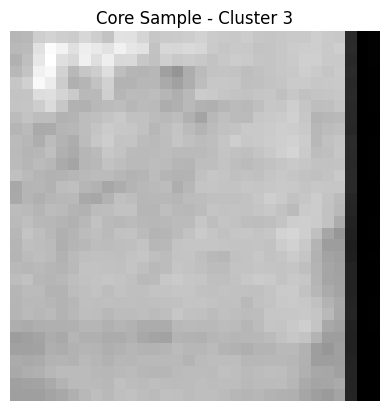

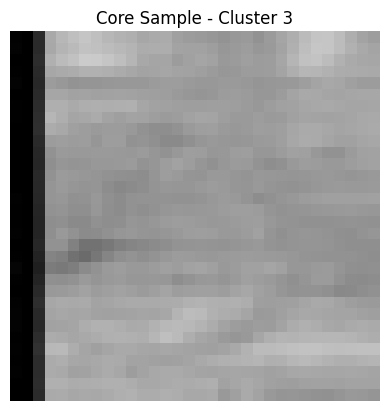

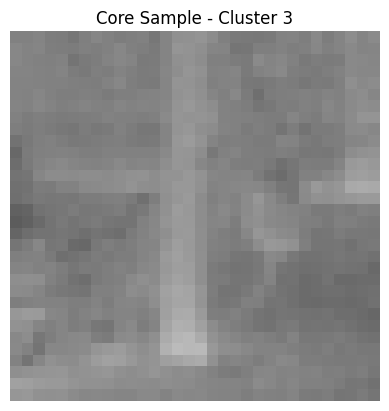

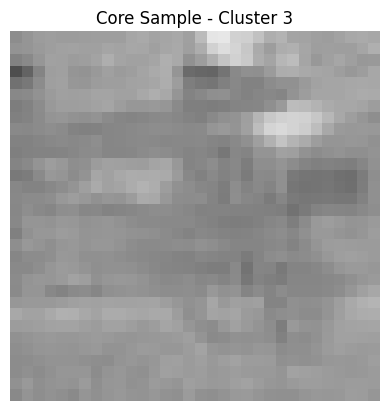

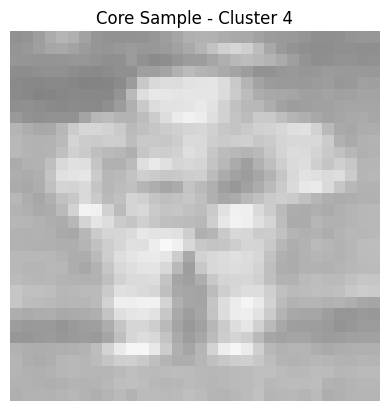

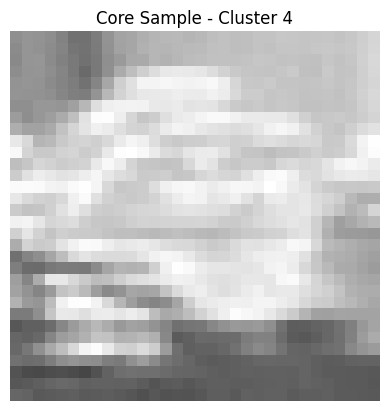

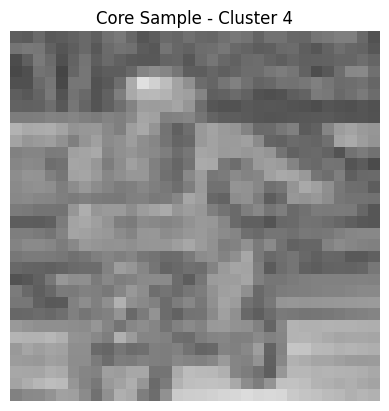

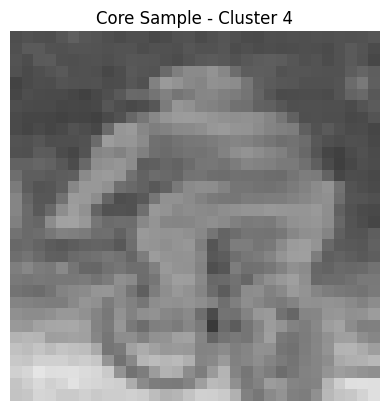

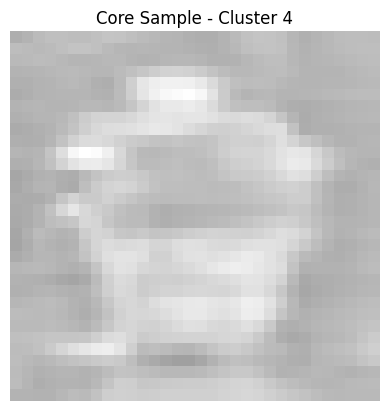

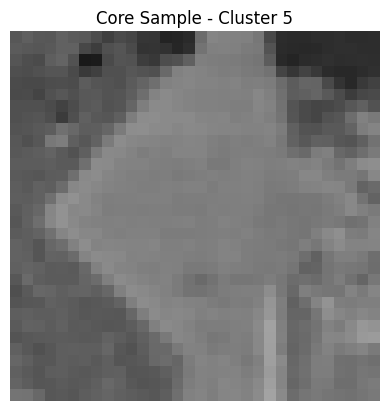

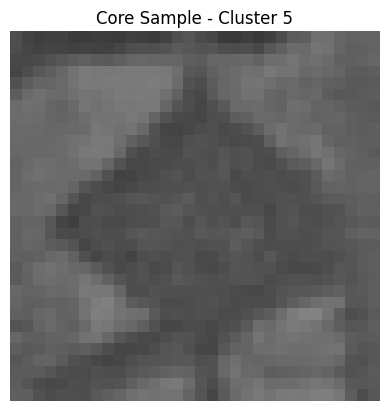

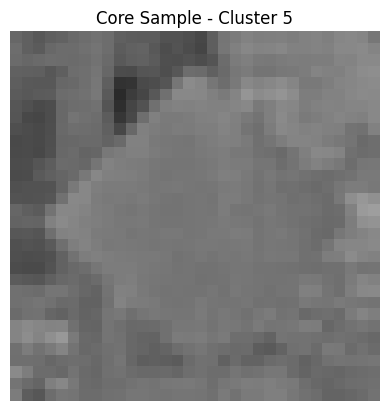

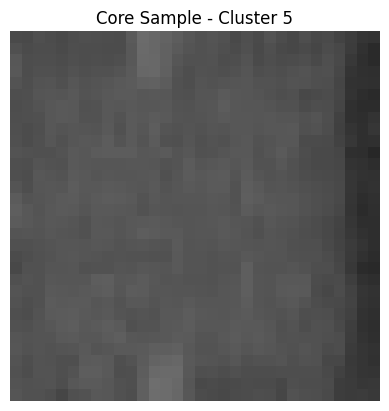

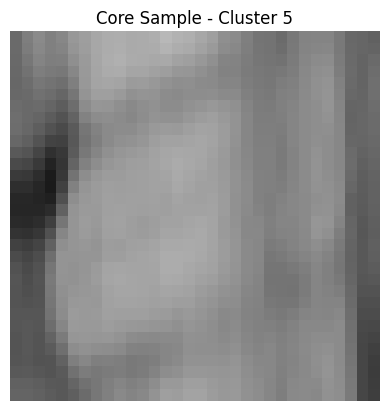

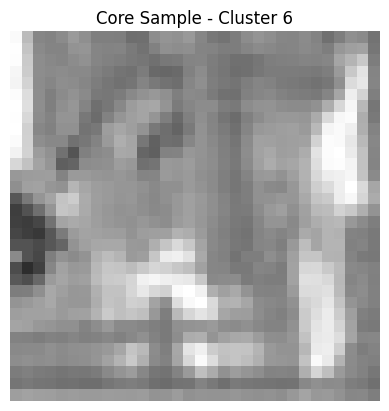

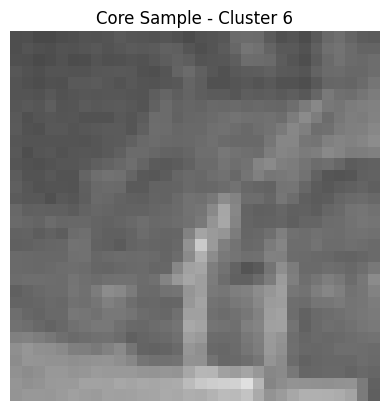

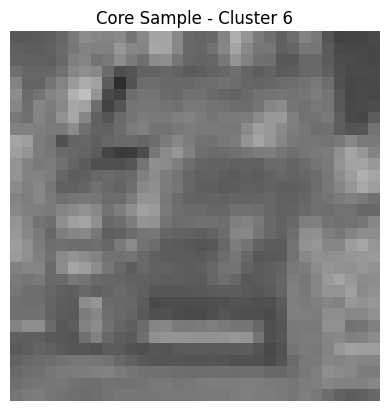

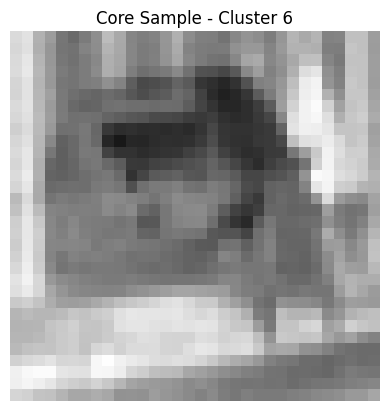

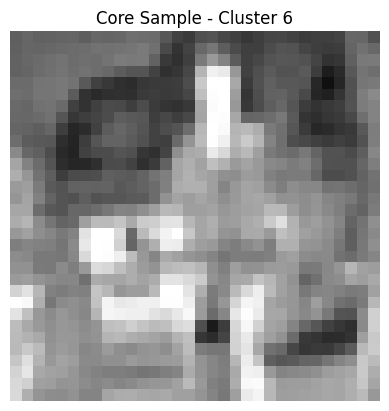

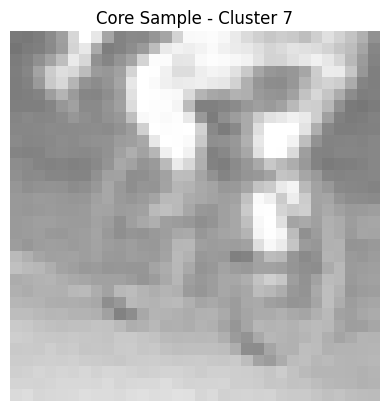

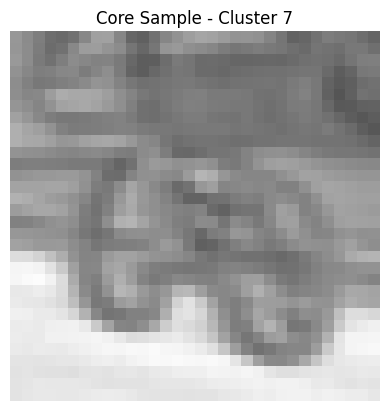

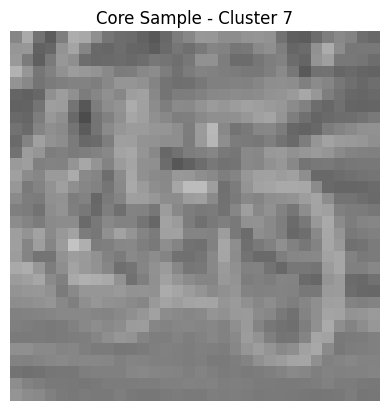

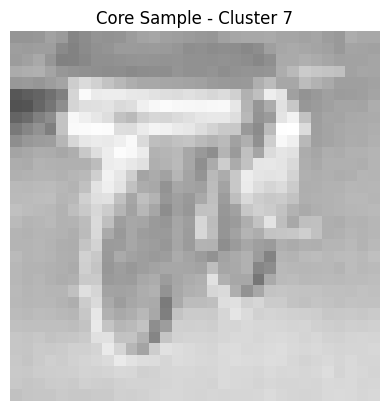

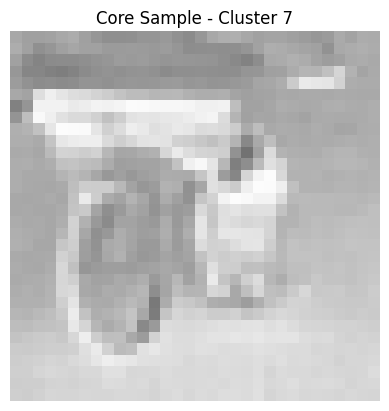

Boundary Samples:


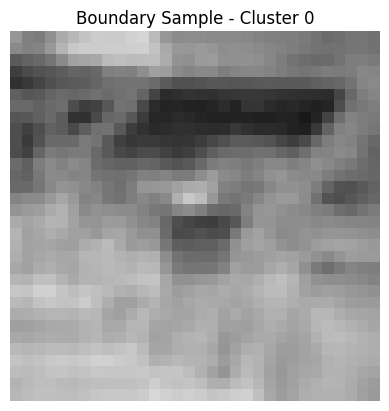

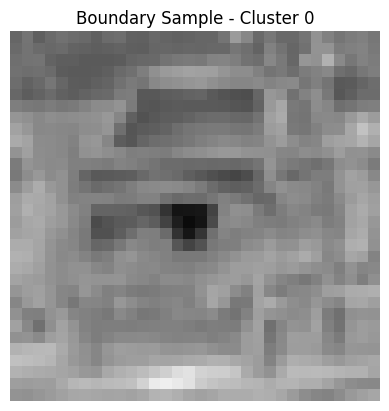

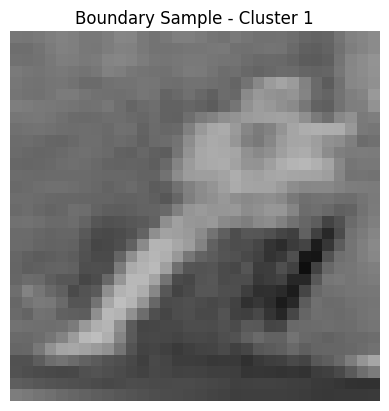

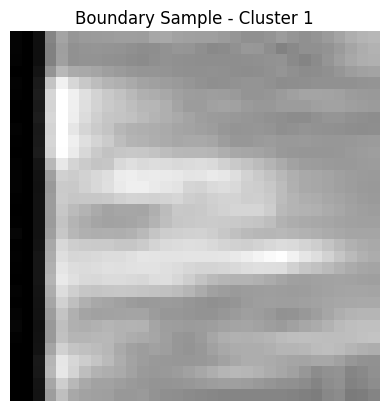

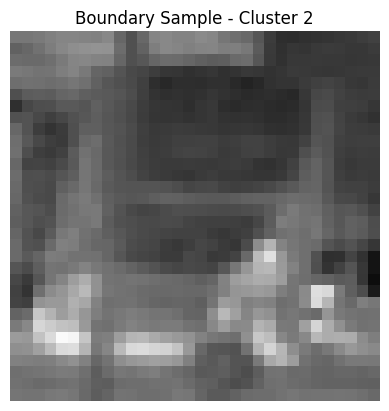

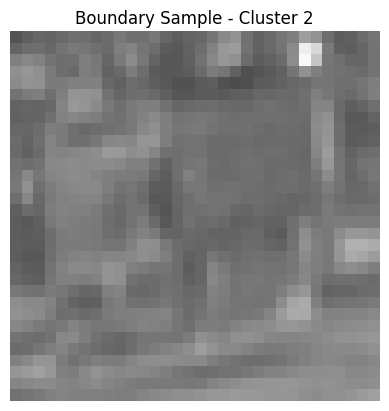

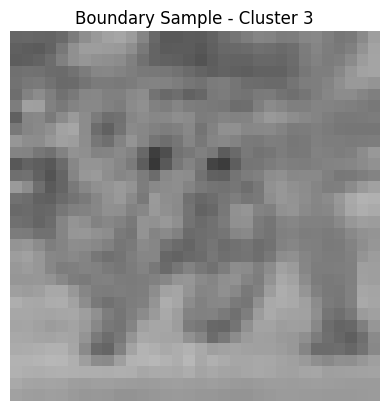

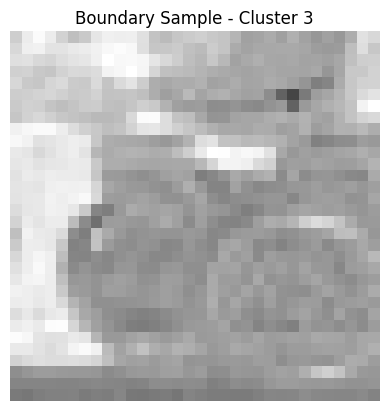

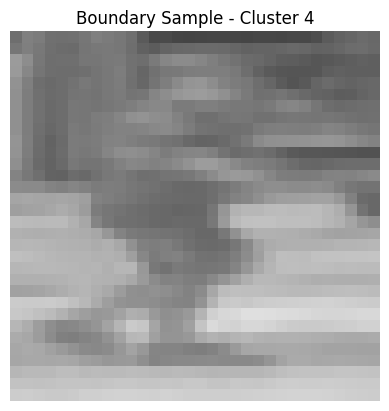

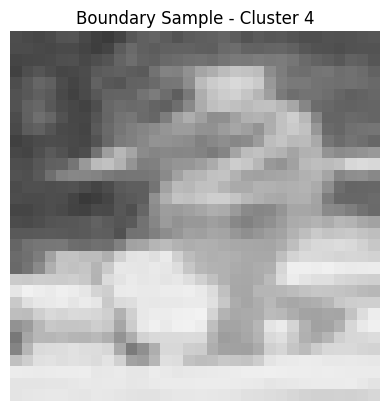

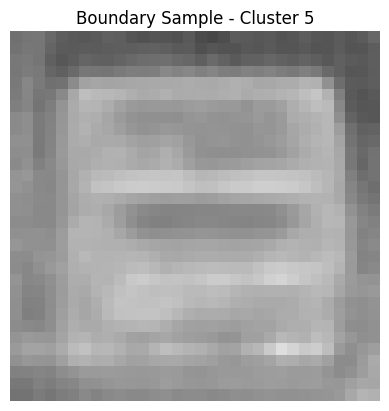

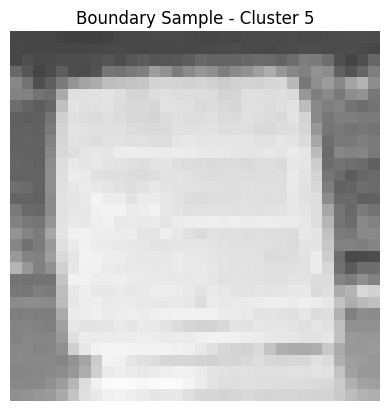

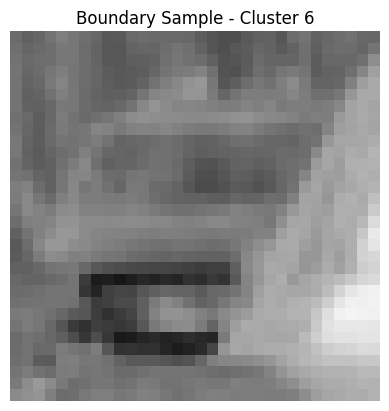

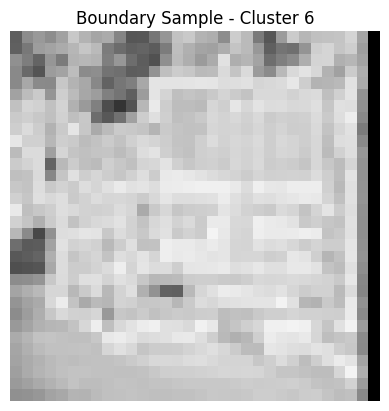

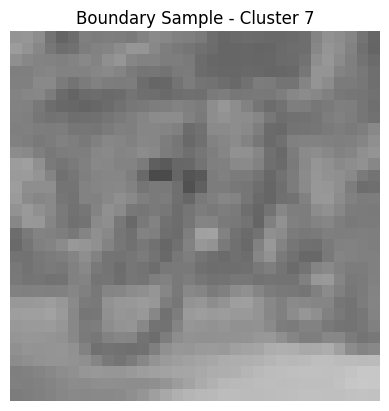

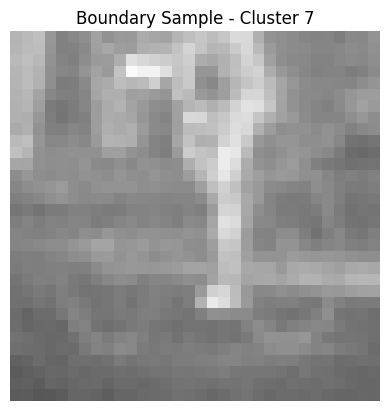

In [46]:
data_with_images = data[data['file_exists']]
X_with_images = data_with_images.iloc[:, 2:].values  
image_names_with_images = data_with_images['image_name'].values  
image_classes_with_images = data_with_images['class'].values  


optimal_k = 8  
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_with_images)
cluster_labels = kmeans.labels_  
silhouette_vals = silhouette_samples(X_with_images, cluster_labels)


core_samples = []
boundary_samples = []

for i in range(optimal_k):
    
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_indices = np.where(cluster_labels == i)[0]

    
    core_samples.extend(cluster_indices[cluster_sil_vals.argsort()[-5:]])  
    boundary_samples.extend(cluster_indices[cluster_sil_vals.argsort()[:2]])  


print("Core Samples:")
for index in core_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Core Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()


print("Boundary Samples:")
for index in boundary_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Boundary Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()

In [47]:

pdf_path = "K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf"
with PdfPages(pdf_path) as pdf:
    

    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=150)  
        fig.suptitle(f"Core Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        core_indices = cluster_indices[cluster_sil_vals.argsort()[-5:]] 
        
        for ax, index in zip(axes, core_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off') 
            ax.set_title(f"Sample {index}", fontsize=10) 
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)


    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=150)  
        fig.suptitle(f"Boundary Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        boundary_indices = cluster_indices[cluster_sil_vals.argsort()[:2]]  
        
        for ax, index in zip(axes, boundary_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off')  
            ax.set_title(f"Sample {index}", fontsize=10)  
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)

print(f"PDF saved successfully at {pdf_path}")

PDF saved successfully at K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf


In [50]:
print(f"Shape of y (true labels): {y.shape}")
print(f"Shape of cluster_labels (predicted clusters): {cluster_labels.shape}")


Shape of y (true labels): (5000,)
Shape of cluster_labels (predicted clusters): (4060,)


In [52]:
X = data.iloc[:, 2:].values  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels_all = kmeans.fit_predict(X)

In [53]:
ari = adjusted_rand_score(y, cluster_labels_all)
print(f"Adjusted Rand Index (ARI) for all samples: {ari:.5f}")

Adjusted Rand Index (ARI) for all samples: 0.75233


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [56]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)


standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

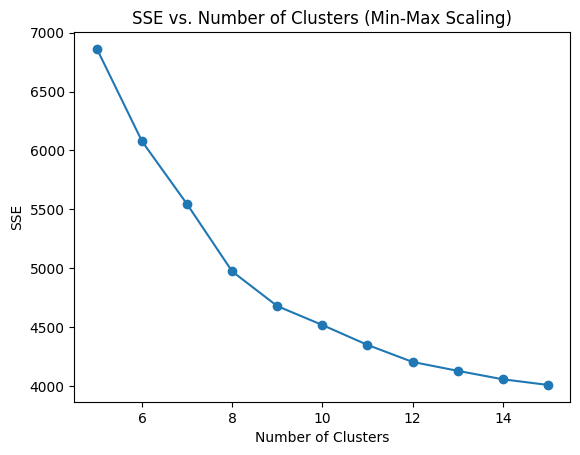

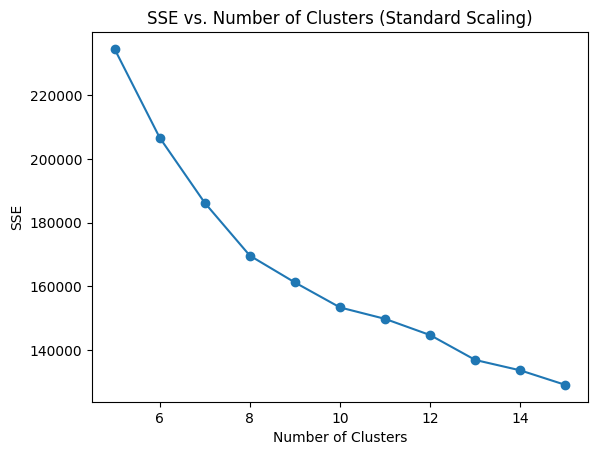

In [57]:
def plot_sse(X_scaled, title):
    sse = []
    for k in range(5, 16):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)
    
    plt.figure()
    plt.plot(range(5, 16), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title(title)
    plt.show()

plot_sse(X_minmax, "SSE vs. Number of Clusters (Min-Max Scaling)")


plot_sse(X_standard, "SSE vs. Number of Clusters (Standard Scaling)")


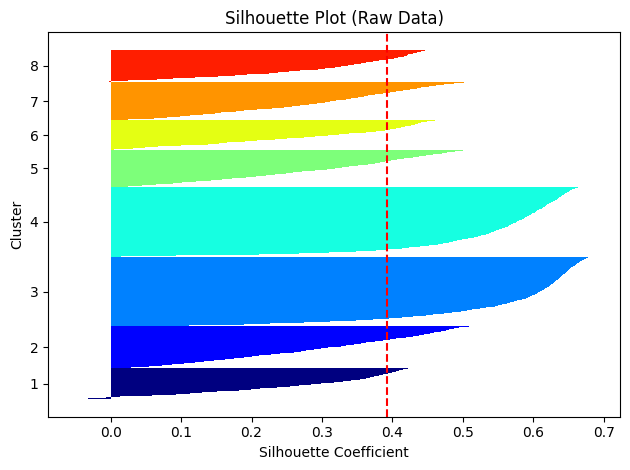

Average Silhouette Score (Silhouette Plot (Raw Data)): 0.39295


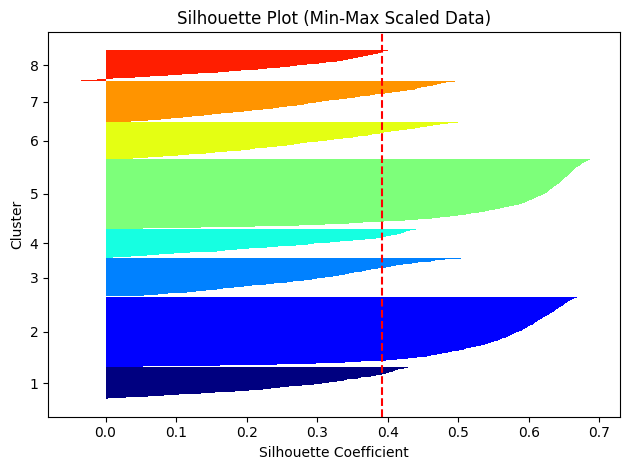

Average Silhouette Score (Silhouette Plot (Min-Max Scaled Data)): 0.39209


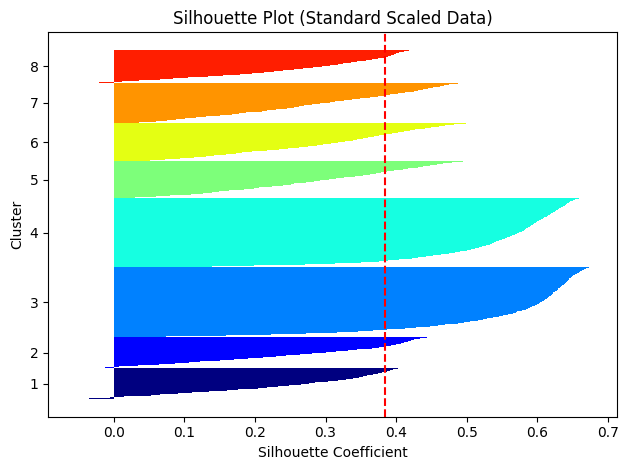

Average Silhouette Score (Silhouette Plot (Standard Scaled Data)): 0.38427


In [59]:
def silhouette_plot(X, title):
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    y_km = kmeans.fit_predict(X)

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    n_clusters = len(np.unique(y_km))

    for i, c in enumerate(np.unique(y_km)):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            edgecolor='none',
            color=color,
            height=1.0,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, np.unique(y_km) + 1)
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print(f"Average Silhouette Score ({title}): {silhouette_avg:.5f}")



silhouette_plot(X, "Silhouette Plot (Raw Data)")


silhouette_plot(X_minmax, "Silhouette Plot (Min-Max Scaled Data)")


silhouette_plot(X_standard, "Silhouette Plot (Standard Scaled Data)")

In [60]:
def compute_ari(X, y, title):
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    ari_score = adjusted_rand_score(y, cluster_labels)
    print(f"Adjusted Rand Index (ARI) ({title}): {ari_score:.5f}")
    return ari_score


ari_raw = compute_ari(X, y, "Raw Data")


ari_minmax = compute_ari(X_minmax, y, "Min-Max Scaled Data")


ari_standard = compute_ari(X_standard, y, "Standard Scaled Data")

Adjusted Rand Index (ARI) (Raw Data): 0.76020
Adjusted Rand Index (ARI) (Min-Max Scaled Data): 0.76433
Adjusted Rand Index (ARI) (Standard Scaled Data): 0.75998


In [74]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [79]:
eps_values = [0.05, .1, 0.2, 0.4, 0.5, .7, .8, .9, 1.0, 1.1]
min_samples_values = [2, 3, 5, 10, 15, 20]


scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
}

results = []


for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
            cluster_labels = dbscan.fit_predict(X_scaled)

            
            ari = adjusted_rand_score(y, cluster_labels)

            
            silhouette = (
                silhouette_score(X_scaled, cluster_labels)
                if len(set(cluster_labels)) > 1
                else -1
            )

            
            results.append({
                "Scaler": scaler_name,
                "eps": eps,
                "min_samples": min_samples,
                "ARI": ari,
                "Silhouette Score": silhouette,
                "Clusters Found": len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0),
                "Noise Points": np.sum(cluster_labels == -1),
            })


results_df = pd.DataFrame(results)

print(results_df.sort_values(by=["ARI", "Silhouette Score"], ascending=False).head(10))

           Scaler  eps  min_samples       ARI  Silhouette Score  \
94   MinMaxScaler  0.7           15  0.454529          0.026738   
95   MinMaxScaler  0.7           20  0.433850          0.120074   
93   MinMaxScaler  0.7           10  0.385707         -0.008860   
101  MinMaxScaler  0.8           20  0.360767          0.194773   
100  MinMaxScaler  0.8           15  0.357603          0.093210   
92   MinMaxScaler  0.7            5  0.352074         -0.031331   
91   MinMaxScaler  0.7            3  0.344588         -0.252654   
90   MinMaxScaler  0.7            2  0.344218         -0.427817   
99   MinMaxScaler  0.8           10  0.341010          0.199356   
98   MinMaxScaler  0.8            5  0.326744         -0.105680   

     Clusters Found  Noise Points  
94                5          2398  
95                4          2486  
93                4          2265  
101               2          1683  
100               3          1578  
92                5          2103  
91        

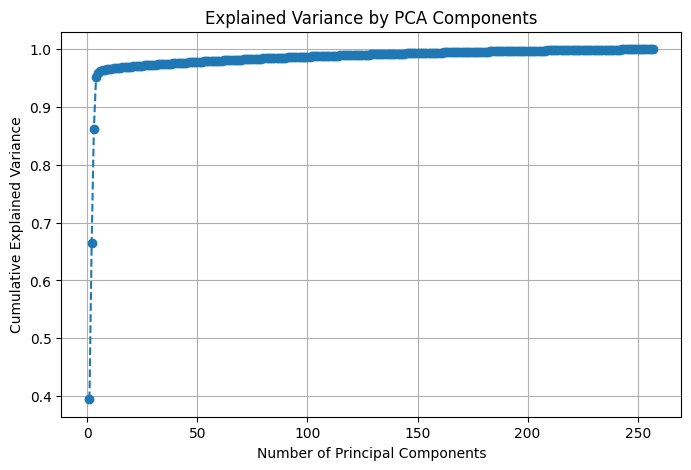

PC1: 0.3947 (0.3947 cumulative)
PC2: 0.2696 (0.6643 cumulative)
PC3: 0.1976 (0.8619 cumulative)
PC4: 0.0898 (0.9516 cumulative)
PC5: 0.0064 (0.9580 cumulative)
PC6: 0.0042 (0.9623 cumulative)
PC7: 0.0014 (0.9637 cumulative)
PC8: 0.0009 (0.9646 cumulative)
PC9: 0.0007 (0.9654 cumulative)
PC10: 0.0007 (0.9660 cumulative)


In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()


for i, ratio in enumerate(explained_variance_ratio[:10], start=1):
    print(f"PC{i}: {ratio:.4f} ({cumulative_variance[i-1]:.4f} cumulative)")

In [81]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by each PC: {explained_variance_ratio}")
print(f"Cumulative explained variance: {sum(explained_variance_ratio):.4f}")

Explained variance by each PC: [0.39915586 0.2753816  0.18712832 0.09180572]
Cumulative explained variance: 0.9535


In [87]:
scaler = MinMaxScaler()
X_minmax_scaled = scaler.fit_transform(X)


pca_components = [3, 4]
results = []

for n_components in pca_components:

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_minmax_scaled)
    
  
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    
    ari = adjusted_rand_score(y, cluster_labels)
    

    silhouette = (
        silhouette_score(X_pca, cluster_labels, metric='euclidean')
        if len(set(cluster_labels)) > 1
        else -1
    )
    
   
    results.append({
        "PCA Components": n_components,
        "ARI Score": ari,
        "Silhouette Score": silhouette,
    })


results_df = pd.DataFrame(results)


print(results_df)

   PCA Components  ARI Score  Silhouette Score
0               3   0.714159          0.414627
1               4   0.764595          0.475295


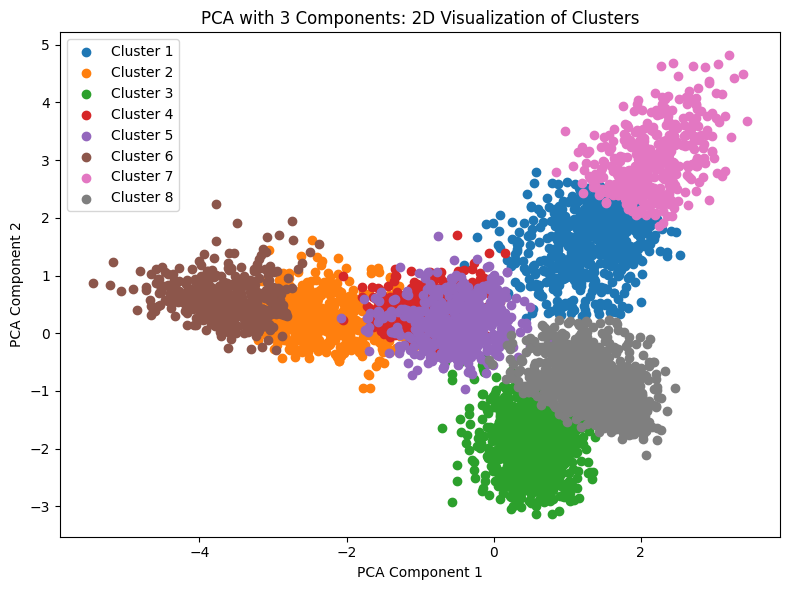

In [88]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_minmax_scaled)
cluster_labels_3 = KMeans(n_clusters=optimal_k, random_state=0).fit_predict(X_pca_3)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = X_pca_3[cluster_labels_3 == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')
    
plt.title("PCA with 3 Components: 2D Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

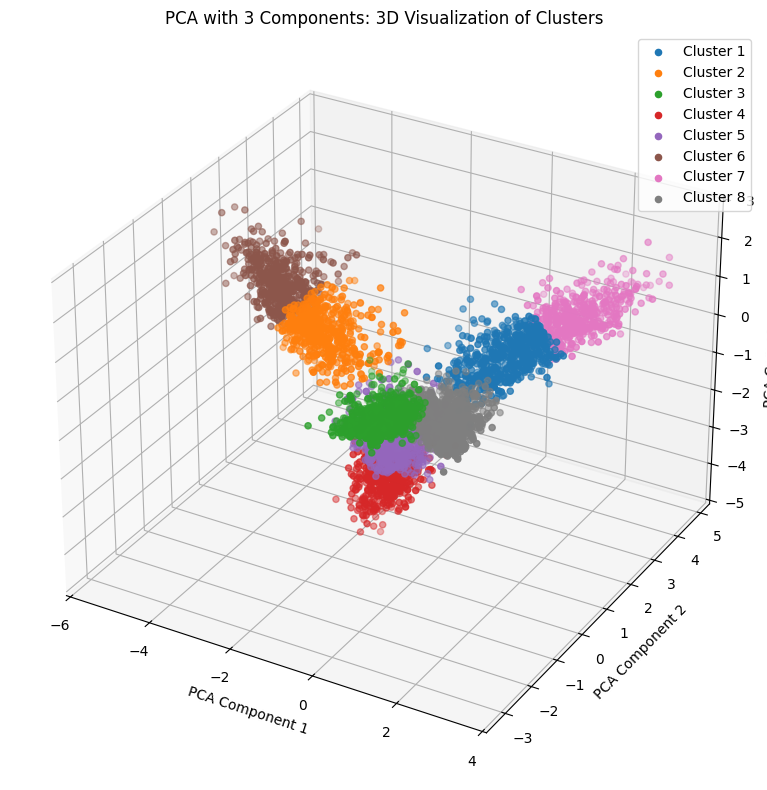

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cluster in range(optimal_k):
    cluster_points = X_pca_3[cluster_labels_3 == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')

ax.set_title("PCA with 3 Components: 3D Visualization of Clusters")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.tight_layout()
plt.show()


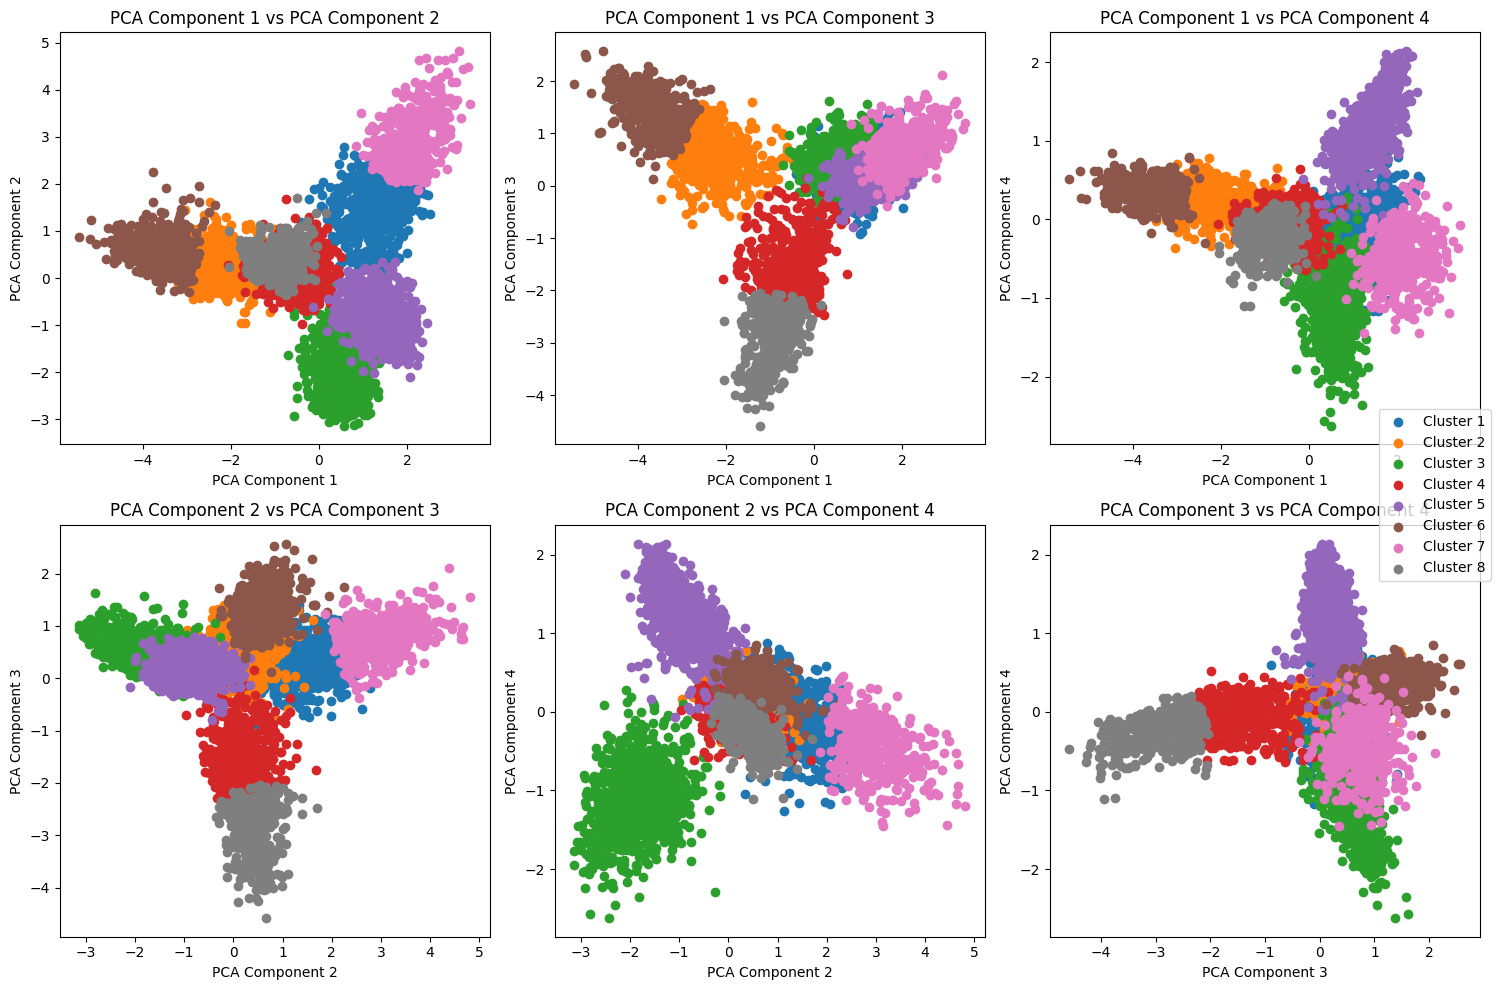

In [90]:
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_minmax_scaled)
cluster_labels_4 = KMeans(n_clusters=optimal_k, random_state=0).fit_predict(X_pca_4)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.ravel()
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (c1, c2) in enumerate(pairs):
    for cluster in range(optimal_k):
        cluster_points = X_pca_4[cluster_labels_4 == cluster]
        axes[i].scatter(cluster_points[:, c1], cluster_points[:, c2], label=f'Cluster {cluster + 1}')
    axes[i].set_title(f"PCA Component {c1 + 1} vs PCA Component {c2 + 1}")
    axes[i].set_xlabel(f"PCA Component {c1 + 1}")
    axes[i].set_ylabel(f"PCA Component {c2 + 1}")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, mutual_info_classif

Feature Selection
Im try different methods

In [95]:

scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}


results = []


optimal_k = 8  


for scaler_name, scaler in scalers.items():
    if scaler is not None:
    
        X_scaled = scaler.fit_transform(X)
        
        
        var_thresh = VarianceThreshold(threshold=0.0)
        X_filtered = var_thresh.fit_transform(X_scaled)
    else:
        
        X_filtered = X.copy()

   
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_filtered)

   
    ari = adjusted_rand_score(y, cluster_labels)

    
    silhouette = (
        silhouette_score(X_filtered, cluster_labels)
        if len(set(cluster_labels)) > 1
        else -1
    )

   
    results.append({
        "Scaler": scaler_name,
        "ARI Score": ari,
        "Silhouette Score": silhouette,
        "Features Retained": X_filtered.shape[1],
        "Total Features Removed": X.shape[1] - X_filtered.shape[1],
    })
    

results_df = pd.DataFrame(results)


print(results_df)    

           Scaler  ARI Score  Silhouette Score  Features Retained  \
0      No Scaling   0.760198          0.392949                257   
1    MinMaxScaler   0.764325          0.392086                257   
2  StandardScaler   0.759982          0.384272                257   

   Total Features Removed  
0                       0  
1                       0  
2                       0  


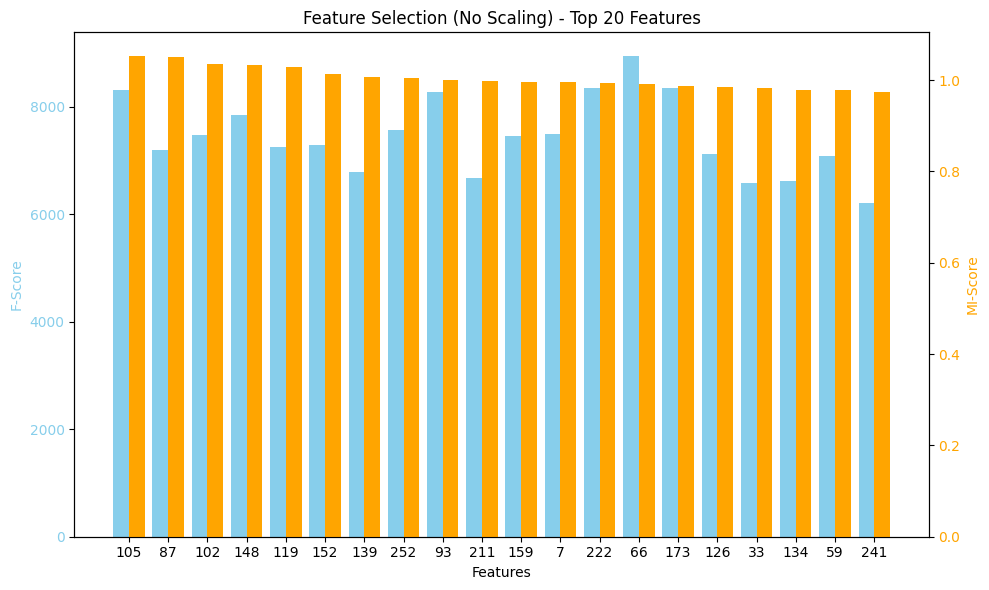

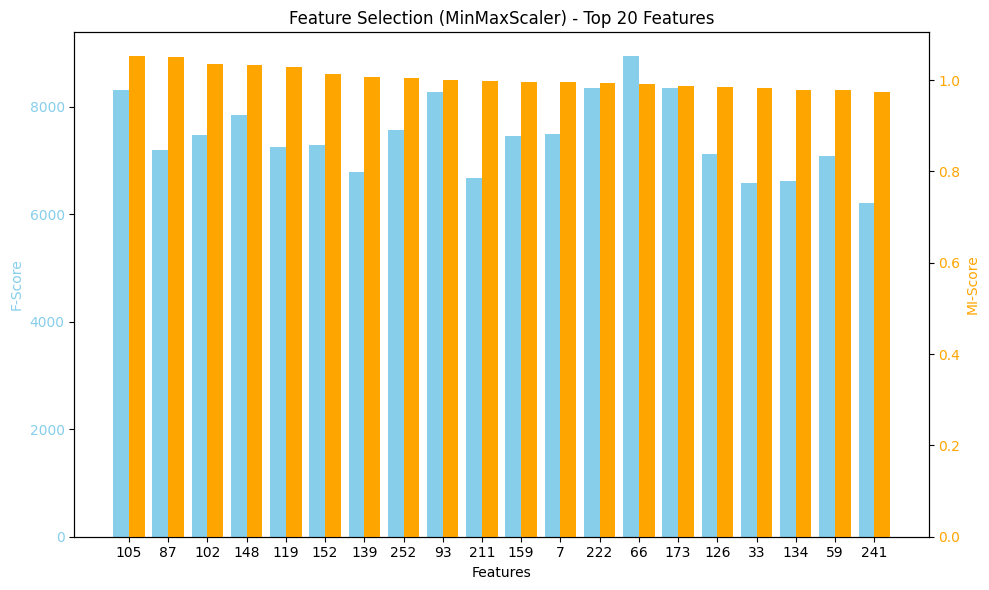

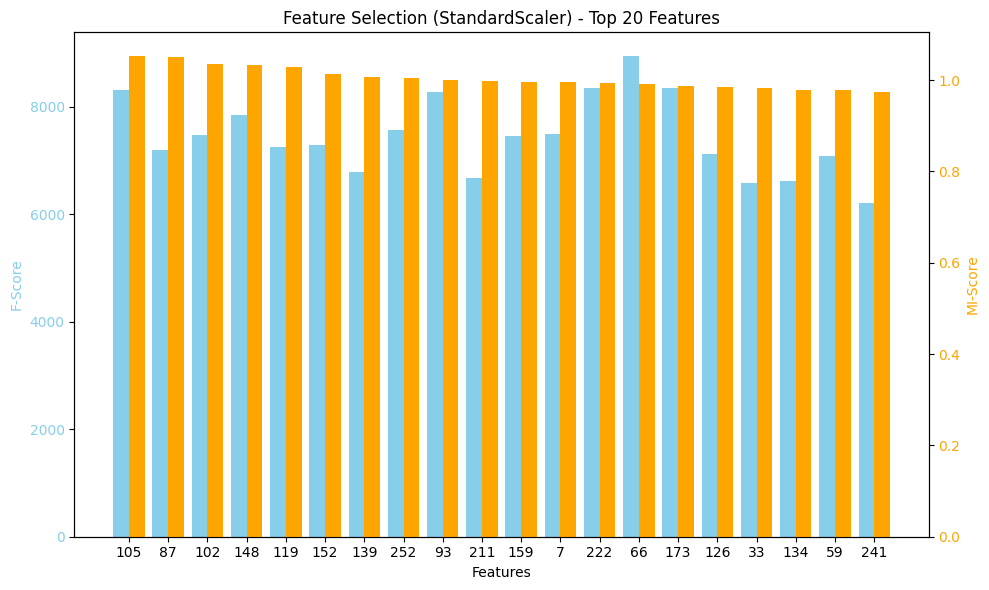

            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.794837          0.504799                 20   
1       No Scaling         6   0.747355          0.467033                 20   
2       No Scaling         7   0.757566          0.436061                 20   
3       No Scaling         8   0.707859          0.406684                 20   
4     MinMaxScaler         5   0.808170          0.511302                 20   
5     MinMaxScaler         6   0.762977          0.472211                 20   
6     MinMaxScaler         7   0.786775          0.444609                 20   
7     MinMaxScaler         8   0.715771          0.391811                 20   
8   StandardScaler         5   0.808092          0.511354                 20   
9   StandardScaler         6   0.763774          0.472903                 20   
10  StandardScaler         7   0.782496          0.444332                 20   
11  StandardScaler         8   0.711451 

In [104]:

scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
cluster_options = [5, 6, 7, 8] 
top_features_count = 20  

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    
    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)


    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='MI_Score', ascending=False)


    selected_features = feature_scores.head(top_features_count).copy()
    selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
    X_reduced = X_scaled[:, selected_indices]


    selected_features['Short_Feature'] = selected_features['Feature'].apply(lambda x: x.split('_')[-1])

    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax2 = ax1.twinx() 

    x = np.arange(len(selected_features))  
    width = 0.4 


    ax1.bar(x - width/2, selected_features['F_Score'], width, label='F-Score', color='skyblue')
    ax1.set_ylabel('F-Score', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    
    ax2.bar(x + width/2, selected_features['MI_Score'], width, label='MI-Score', color='orange')
    ax2.set_ylabel('MI-Score', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

  
    plt.xticks(x, selected_features['Short_Feature'], rotation=90)
    ax1.set_xlabel('Features')
    plt.title(f"Feature Selection ({scaler_name}) - Top {top_features_count} Features")

    fig.tight_layout()
    plt.show()

   
    for k in cluster_options:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(X_reduced)

        
        ari = adjusted_rand_score(y, cluster_labels)
        silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1

      
        results.append({
            "Scaler": scaler_name,
            "Clusters": k,
            "ARI Score": ari,
            "Silhouette Score": silhouette,
            "Features Retained": top_features_count,
            "Selected Features": list(selected_features['Feature']),
            "F_Scores": list(selected_features['F_Score']),
            "MI_Scores": list(selected_features['MI_Score']),
        })


results_df = pd.DataFrame(results)


print(results_df)

In [106]:
scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

cluster_options = [5, 6, 7, 8] 
feature_counts = [10, 20, 40, 50, 100]  

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    

    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    
    
    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='MI_Score', ascending=False)
    
   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]
        
       
        for k in cluster_options:
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
            cluster_labels = kmeans.fit_predict(X_reduced)
            
            
            ari = adjusted_rand_score(y, cluster_labels)
            silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1
            
     
            results.append({
                "Scaler": scaler_name,
                "Clusters": k,
                "ARI Score": ari,
                "Silhouette Score": silhouette,
                "Features Retained": top_features_count,
                "Selected Features": list(selected_features['Feature']),
                "F_Scores": list(selected_features['F_Score']),
                "MI_Scores": list(selected_features['MI_Score']),
            })


results_df = pd.DataFrame(results)

print(results_df)


            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.784276          0.518593                 10   
1       No Scaling         6   0.736877          0.481287                 10   
2       No Scaling         7   0.734416          0.449801                 10   
3       No Scaling         8   0.676409          0.397921                 10   
4       No Scaling         5   0.794837          0.504799                 20   
5       No Scaling         6   0.747355          0.467033                 20   
6       No Scaling         7   0.757566          0.436061                 20   
7       No Scaling         8   0.707859          0.406684                 20   
8       No Scaling         5   0.871990          0.511716                 40   
9       No Scaling         6   0.841964          0.491805                 40   
10      No Scaling         7   0.801395          0.449816                 40   
11      No Scaling         8   0.734363 

In [107]:
scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

cluster_options = [5, 6, 7, 8]  
feature_counts = [10, 20, 40, 50, 100] 

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    

    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    

    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)  # Now rank by F_Score
    
   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]
        
     
        for k in cluster_options:
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
            cluster_labels = kmeans.fit_predict(X_reduced)
            
            # Calculate scores
            ari = adjusted_rand_score(y, cluster_labels)
            silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1
            
       
            results.append({
                "Scaler": scaler_name,
                "Clusters": k,
                "ARI Score": ari,
                "Silhouette Score": silhouette,
                "Features Retained": top_features_count,
                "Selected Features": list(selected_features['Feature']),
                "F_Scores": list(selected_features['F_Score']),
                "MI_Scores": list(selected_features['MI_Score']),
            })


results_df = pd.DataFrame(results)


print(results_df)

            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.631062          0.436409                 10   
1       No Scaling         6   0.565367          0.382777                 10   
2       No Scaling         7   0.548650          0.385196                 10   
3       No Scaling         8   0.511756          0.358834                 10   
4       No Scaling         5   0.700700          0.430784                 20   
5       No Scaling         6   0.767434          0.431563                 20   
6       No Scaling         7   0.737955          0.396520                 20   
7       No Scaling         8   0.657060          0.377078                 20   
8       No Scaling         5   0.870639          0.492454                 40   
9       No Scaling         6   0.815509          0.474813                 40   
10      No Scaling         7   0.778070          0.436658                 40   
11      No Scaling         8   0.707779 

I will base my scores base on M-score not F-score because overall M-Score tends to have more weight towards my ari and siloutte scores as a feature selection than F-score. Im select minmax and standard scaler and try features retained at 50 and 100 with cluster groups of 5 and 6. I will now try PCA 1 - 4 with this to see what the differences are when i measure the ARI and Silouette Scores now. 

            Scaler  Features Retained  PCA Components  Clusters  ARI Score  \
0     MinMaxScaler                 50               2         5   0.825350   
1     MinMaxScaler                 50               2         6   0.803239   
2     MinMaxScaler                 50               3         5   0.870909   
3     MinMaxScaler                 50               3         6   0.823252   
4     MinMaxScaler                 50               4         5   0.900032   
5     MinMaxScaler                 50               4         6   0.860926   
6     MinMaxScaler                100               2         5   0.829004   
7     MinMaxScaler                100               2         6   0.801207   
8     MinMaxScaler                100               3         5   0.876670   
9     MinMaxScaler                100               3         6   0.825822   
10    MinMaxScaler                100               4         5   0.924726   
11    MinMaxScaler                100               4         6 

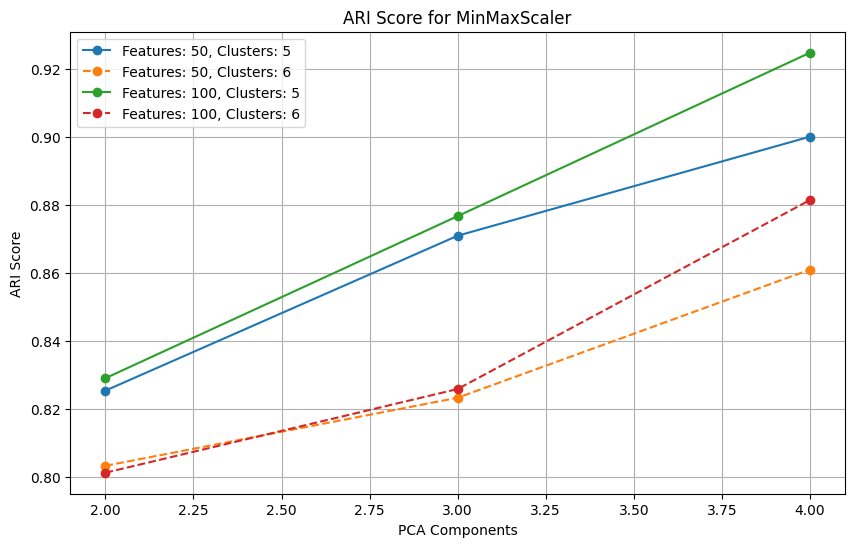

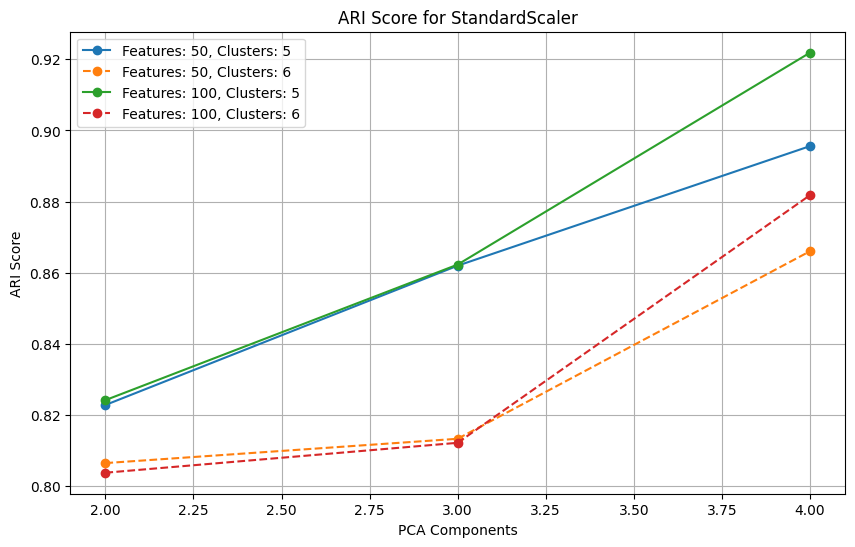

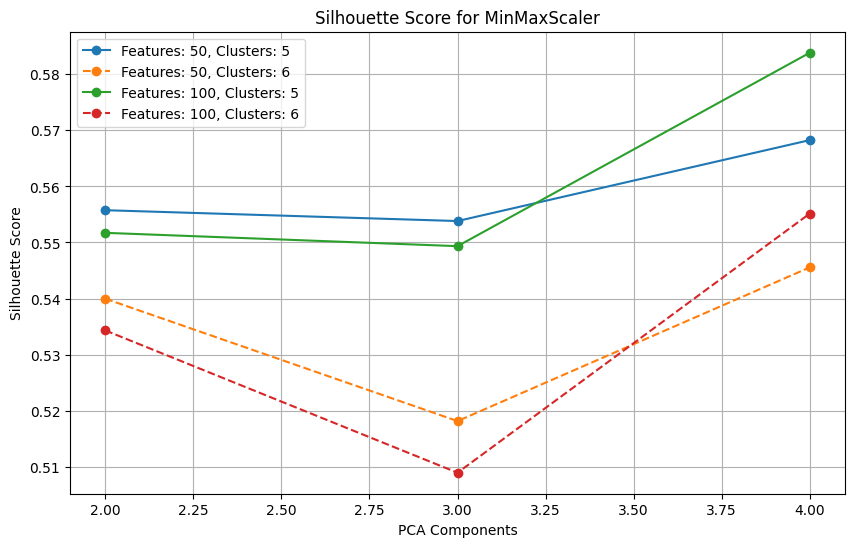

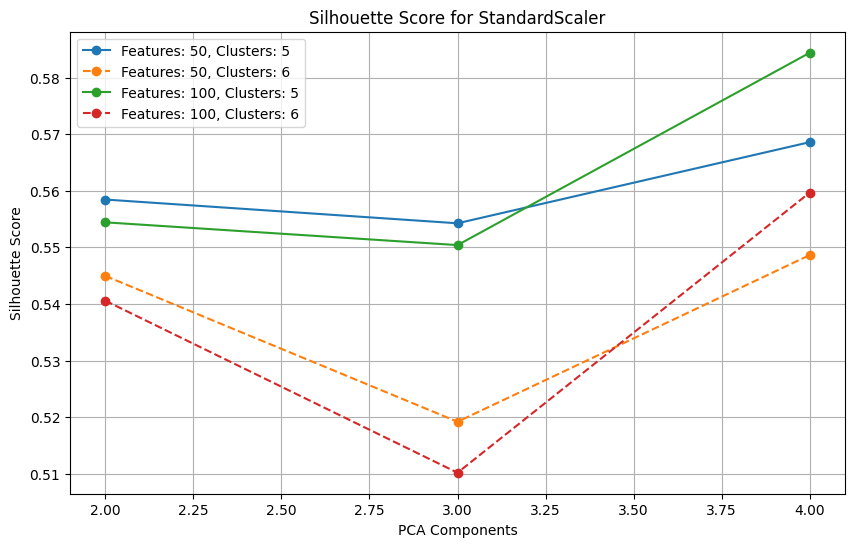

In [111]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
}


feature_counts = [50, 100]
pca_components = [2, 3, 4]  
cluster_options = [5, 6] 
results = []


for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'MI_Score': mi_scores
    }).sort_values(by='MI_Score', ascending=False)

   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]

     
        for n_components in pca_components:
            pca = PCA(n_components=n_components)
            X_pca = pca.fit_transform(X_reduced)

        
            for k in cluster_options:
                kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
                cluster_labels = kmeans.fit_predict(X_pca)

                
                ari = adjusted_rand_score(y, cluster_labels)
                silhouette = silhouette_score(X_pca, cluster_labels) if len(set(cluster_labels)) > 1 else -1

            
                results.append({
                    "Scaler": scaler_name,
                    "Features Retained": top_features_count,
                    "PCA Components": n_components,
                    "Clusters": k,
                    "ARI Score": ari,
                    "Silhouette Score": silhouette
                })


results_df = pd.DataFrame(results)

print(results_df)
     
for metric in ["ARI Score", "Silhouette Score"]:
    for scaler_name in scalers.keys():
        subset = results_df[results_df["Scaler"] == scaler_name]
        plt.figure(figsize=(10, 6))
        
        for top_features_count in feature_counts:
            for k in cluster_options:
                sub_subset = subset[(subset["Features Retained"] == top_features_count) & (subset["Clusters"] == k)]
                linestyle = '-' if k == 5 else '--'  
                
                plt.plot(
                    sub_subset["PCA Components"],
                    sub_subset[metric],
                    marker='o',
                    linestyle=linestyle,
                    label=f"Features: {top_features_count}, Clusters: {k}"
                )
        
        plt.title(f"{metric} for {scaler_name}")
        plt.xlabel("PCA Components")
        plt.ylabel(metric)
        plt.legend()
        plt.grid()
        plt.show()

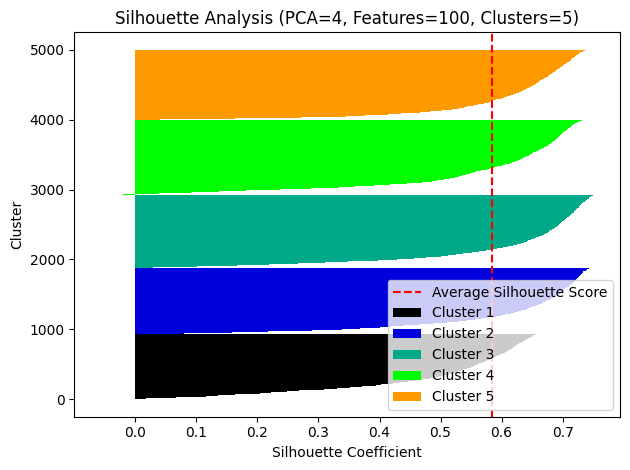

Average Silhouette Score: 0.5839


In [112]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

f_scores, _ = f_classif(X_scaled, y)
mi_scores = mutual_info_classif(X_scaled, y, random_state=0)

feature_scores = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
    'F_Score': f_scores,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

top_features = feature_scores.head(100)['Feature']
selected_indices = [int(f.split('_')[1]) for f in top_features]
X_reduced = X_scaled[:, selected_indices]


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_reduced)


kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)


silhouette_vals = silhouette_samples(X_pca, cluster_labels)
silhouette_avg = silhouette_score(X_pca, cluster_labels)


y_lower, y_upper = 0, 0
for i in range(5):  
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_sil_vals.sort()
    y_upper += len(cluster_sil_vals)
    color = plt.cm.nipy_spectral(float(i) / 5)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', color=color, height=1.0, label=f"Cluster {i+1}")
    y_lower += len(cluster_sil_vals)


plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Analysis (PCA=4, Features=100, Clusters=5)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average Silhouette Score: {silhouette_avg:.4f}")